# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 38
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
dataset = pd.DataFrame()
dataset["reviews"] = reviews
dataset.head()

,reviews
0,✅ Trip Verified | An airline that lives in the...
1,✅ Trip Verified | Check-in Desk rude and dism...
2,✅ Trip Verified | I chose British Airways espe...
3,Not Verified | I booked Premium Economy from I...
4,✅ Trip Verified | A simple story with an unfor...


In [4]:
dataset.tail()

,reviews
3606,This was a bmi Regional operated flight on a R...
3607,LHR to HAM. Purser addresses all club passenge...
3608,My son who had worked for British Airways urge...
3609,London City-New York JFK via Shannon on A318 b...
3610,SIN-LHR BA12 B747-436 First Class. Old aircraf...


In [5]:
dataset.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [6]:
dataset.reviews= dataset.reviews.str.split('|',expand=True)[1]

In [7]:
print(dataset)

                                                reviews
0      An airline that lives in their past glory and...
1       Check-in Desk rude and dismissive. Flight la...
2      I chose British Airways especially because I ...
3      I booked Premium Economy from INV to LAX (via...
4      A simple story with an unfortunate outcome th...
...                                                 ...
3606                                               None
3607                                               None
3608                                               None
3609                                               None
3610                                               None

[3611 rows x 1 columns]


## Step-01 Cleaning The Text

In [8]:
import re

def clean(raw_text):
    return re.sub('[^a-zA-Z]',' ',str(raw_text)).lower()

In [9]:
dataset['clean_reviews'] = dataset['reviews'].apply(clean)
dataset.head()

,reviews,clean_reviews
0,An airline that lives in their past glory and...,an airline that lives in their past glory and...
1,Check-in Desk rude and dismissive. Flight la...,check in desk rude and dismissive flight la...
2,I chose British Airways especially because I ...,i chose british airways especially because i ...
3,I booked Premium Economy from INV to LAX (via...,i booked premium economy from inv to lax via...
4,A simple story with an unfortunate outcome th...,a simple story with an unfortunate outcome th...


## Step-02 Tokenization, Stopwords Removal & POS Tagging

In [10]:
import nltk

nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to C:\Users\Awais Tanveer
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Awais Tanveer
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    
    newlist = []
    for word, tag in tags:
        if word not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

dataset['POS_tagged'] = dataset['clean_reviews'].apply(token_stop_pos)
dataset.head()

,reviews,clean_reviews,POS_tagged
0,An airline that lives in their past glory and...,an airline that lives in their past glory and...,"[(airline, n), (lives, v), (past, a), (glory, ..."
1,Check-in Desk rude and dismissive. Flight la...,check in desk rude and dismissive flight la...,"[(check, n), (desk, n), (rude, n), (dismissive..."
2,I chose British Airways especially because I ...,i chose british airways especially because i ...,"[(chose, v), (british, a), (airways, n), (espe..."
3,I booked Premium Economy from INV to LAX (via...,i booked premium economy from inv to lax via...,"[(booked, v), (premium, a), (economy, n), (inv..."
4,A simple story with an unfortunate outcome th...,a simple story with an unfortunate outcome th...,"[(simple, a), (story, n), (unfortunate, a), (o..."


## Step-03 Obtaining Stem Words

In [12]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_raw = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_raw = lemma_raw + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_raw = lemma_raw + " " + lemma
    return lemma_raw

dataset['lemma'] = dataset['POS_tagged'].apply(lemmatize)
dataset.head()

,reviews,clean_reviews,POS_tagged,lemma
0,An airline that lives in their past glory and...,an airline that lives in their past glory and...,"[(airline, n), (lives, v), (past, a), (glory, ...",airline live past glory head future crisis b...
1,Check-in Desk rude and dismissive. Flight la...,check in desk rude and dismissive flight la...,"[(check, n), (desk, n), (rude, n), (dismissive...",check desk rude dismissive flight late seem ...
2,I chose British Airways especially because I ...,i chose british airways especially because i ...,"[(chose, v), (british, a), (airways, n), (espe...",choose british airway especially go travel n...
3,I booked Premium Economy from INV to LAX (via...,i booked premium economy from inv to lax via...,"[(booked, v), (premium, a), (economy, n), (inv...",book premium economy inv lax via lhr notify ...
4,A simple story with an unfortunate outcome th...,a simple story with an unfortunate outcome th...,"[(simple, a), (story, n), (unfortunate, a), (o...",simple story unfortunate outcome really coul...


## Sentiment Analysis using VADER

In [13]:
!pip install vaderSentiment

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'

In [15]:
dataset['sentiment'] = dataset['lemma'].apply(vadersentimentanalysis)
dataset['analysis'] = dataset['sentiment'].apply(vader_analysis)
dataset.head()

,reviews,clean_reviews,POS_tagged,lemma,sentiment,analysis
0,An airline that lives in their past glory and...,an airline that lives in their past glory and...,"[(airline, n), (lives, v), (past, a), (glory, ...",airline live past glory head future crisis b...,-0.7351,Negative
1,Check-in Desk rude and dismissive. Flight la...,check in desk rude and dismissive flight la...,"[(check, n), (desk, n), (rude, n), (dismissive...",check desk rude dismissive flight late seem ...,-0.6705,Negative
2,I chose British Airways especially because I ...,i chose british airways especially because i ...,"[(chose, v), (british, a), (airways, n), (espe...",choose british airway especially go travel n...,-0.8074,Negative
3,I booked Premium Economy from INV to LAX (via...,i booked premium economy from inv to lax via...,"[(booked, v), (premium, a), (economy, n), (inv...",book premium economy inv lax via lhr notify ...,-0.5719,Negative
4,A simple story with an unfortunate outcome th...,a simple story with an unfortunate outcome th...,"[(simple, a), (story, n), (unfortunate, a), (o...",simple story unfortunate outcome really coul...,0.9211,Positive


In [16]:
vader_counts = dataset['analysis'].value_counts()
vader_counts

Neutral     1764
Positive    1079
Negative     768
Name: analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x286cd3b8160>,
 [Text(0.039707186657720064, 1.0992831024480132, 'Neutral'),
  Text(-0.7122255409619723, -0.838292776302782, 'Positive'),
  Text(1.0596959513456132, -0.8363877633620161, 'Negative')],
 [Text(0.021658465449665487, 0.5996089649716435, '48.9%'),
  Text(-0.3884866587065303, -0.45725060525606287, '29.9%'),
  Text(0.6672159693657564, -0.5266145176723804, '21.3%')])

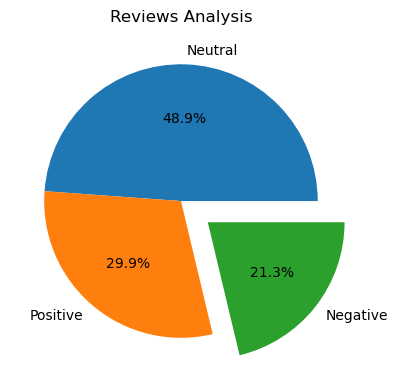

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [19]:
!pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 1.0 MB/s eta 0:00:00


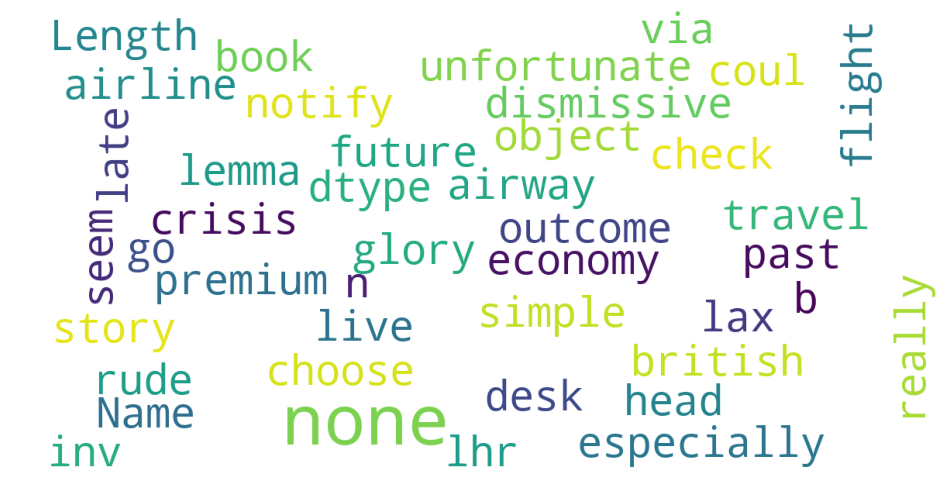

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(dataset.lemma)